# 과제 7 & 8: 그래프 알고리즘
---
박정현(pwjdgus1017@donga.ac.kr), 배정훈(rhenus9911@gmail.com), 최재혁(fkdlfkdl68@donga.ac.kr), 권건우(a71463092@gmail.com)
---
우리는 그래프에 대한 이론을 학습하였다. 특히, 우리는 다양한 그래프에 대한 종류(Complete graph, isomorphism graph, homomorphism graph, spanning graph, euler graph, hamilton graph 등을 학삽하였다. 또한 그에 관련된 알고리즘으로써, 우리는 그래프 종류에 대한 평가 방법(각 그래프 종류 판별법) 및 관련된 알고리즘(판매원 탐방, 최단 경로, 그래프 컬러링 등)를 학습하였다. 이를 기반으로, 아래의 주어진 문제 7, 8 에 대한 코드를 작성하시오.




# 해당파일 활용 방법- [메뉴] 파일->드라이브에 사본 저장을 통해서 프로그램 실행하시면 됩니다.

# 문제 7: 여러가지 그래프 판별법
Isomorphism graph, Sparse and Dense graphs, Euler and Hamiltonian graph를 인지를 확인하는 코드를 작성하시오.


In [1]:
import networkx as nx



```
# 코드로 형식 지정됨
```

## 문제 7-1: Isomorphism
주어진 두 Directed 그래프 (G1, G2) 로부터 Isomorphism graph 인지를 판별하기

In [6]:
import itertools
import networkx as nx

def is_isomorphic(G1, G2):
    '''
    G1과 G2가 isomorphic 관계인지를 체크
    :param G1: Directed 그래프 (nx.DiGraph)
    :param G2: Directed 그래프 (nx.DiGraph)
    :return: Boolean
    '''
    # 1. 그래프 타입 체크
    if not isinstance(G1, nx.DiGraph) or not isinstance(G2, nx.DiGraph):
        raise TypeError("Both inputs must be networkx.DiGraph")

    # 2. 기본 조건 체크
    if G1.number_of_nodes() != G2.number_of_nodes():
        return False
    if G1.number_of_edges() != G2.number_of_edges():
        return False

    nodes1 = list(G1.nodes())
    nodes2 = list(G2.nodes())

    # 3. in-degree / out-degree 분포가 일치하는지 먼저 확인
    degs1 = sorted([(G1.in_degree(n), G1.out_degree(n)) for n in nodes1])
    degs2 = sorted([(G2.in_degree(n), G2.out_degree(n)) for n in nodes2])
    if degs1 != degs2:
        return False

    # 4. 순열 생성 후 확인
    for perm in itertools.permutations(nodes2):
        mapping = dict(zip(nodes1, perm))

        # 모든 edge (u,v)가 매핑 후에도 존재하는지 확인
        valid = True
        for u, v in G1.edges():
            if (mapping[u], mapping[v]) not in G2.edges():
                valid = False
                break

        if valid:
            return True

    return False


In [7]:
g1 = nx.DiGraph()
g2 = nx.DiGraph()
nx.add_path(g1, [1,2,3,4,5,6,7,8,9,10])
nx.add_path(g2, [10,20,30,40,50,60,70,80,90,100])
print(is_isomorphic(g1,g2)) # nx.is_isomorphic 사용하지 말 것

True


## 문제 7-2: Graph Density
다음 그래프에 대해서 Graph Density를 계산하는 구하는 함수 def calculate_density()를 작성하여라. 또한

In [10]:
def calculate_density(G):
    '''
    :param G: networkx Graph (directed or undirected)
    :return: graph density의 값 [0,1]
    '''
    if not isinstance(G, (nx.Graph, nx.DiGraph)):
        raise TypeError("Input must be a networkx Graph or DiGraph")

    n = G.number_of_nodes()
    m = G.number_of_edges()

    if n <= 1:
        return 0.0

    # Directed / Undirected 구분
    if G.is_directed():
        max_edges = n * (n - 1)
    else:
        max_edges = n * (n - 1) / 2

    return m / max_edges


In [11]:
g = nx.watts_strogatz_graph(50, 20, 1)
calculate_density(g) # nx.density 사용하지 말 것

0.40816326530612246

## 문제 7-3: Euler graph
다음 주어진 그래프가 Euler graph 인지를 확인하는 코드를 작성하시오

In [12]:
def is_Eulerian(g):
    '''
    :param g: undirected graph
    :return: Boolean
    '''
    if not isinstance(g, nx.Graph) or g.is_directed():
        raise TypeError("Input must be an undirected graph (nx.Graph)")

    # edge가 없으면 Eulerian 아님
    if g.number_of_edges() == 0:
        return False

    # 연결성 확인 (edge가 있는 부분만 고려)
    if not nx.is_connected(g):
        return False

    # 모든 정점의 차수가 짝수인지 확인
    for node in g.nodes():
        if g.degree(node) % 2 != 0:
            return False

    return True

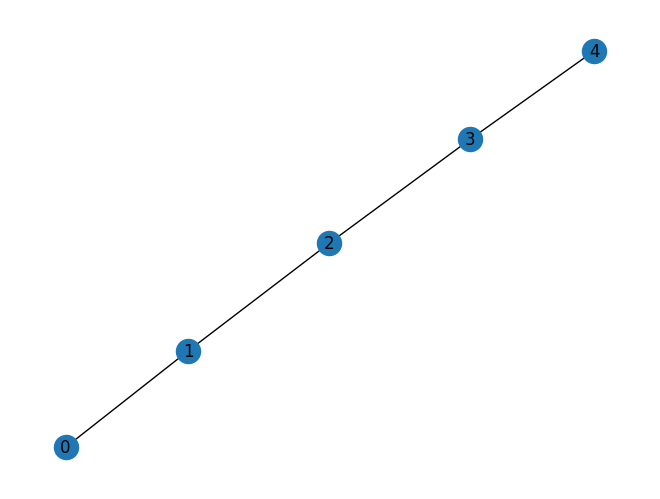

In [13]:
g = nx.path_graph(5)
nx.draw(g, with_labels=True)

In [ ]:
is_Eulerian(g) # nx.is_Eulerian 사용하지 말 것

# 문제 7-4: Hamilton Graph

다음 graph1, graph2, graph3이 hamilton graph 인지를 판별하는 프로그램을 구현하라

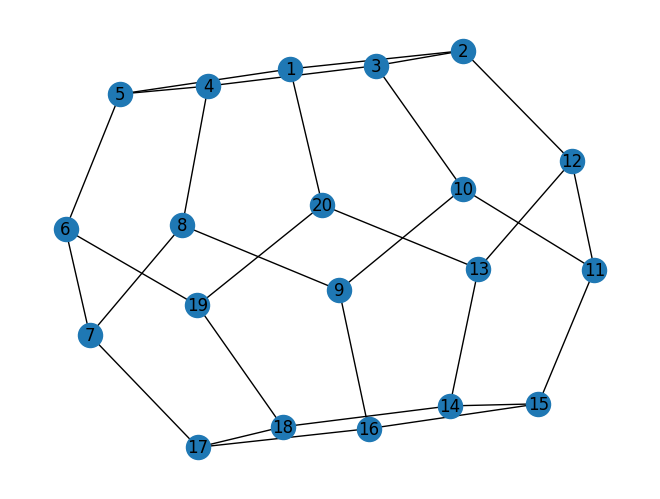

In [14]:
# q1
g = nx.Graph()

g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(5,1)
g.add_edge(1,20)
g.add_edge(2,12)
g.add_edge(3,10)
g.add_edge(4,8)
g.add_edge(5,6)
g.add_edge(12,13)
g.add_edge(13,20)
g.add_edge(20,19)
g.add_edge(19,6)
g.add_edge(6,7)
g.add_edge(7,8)
g.add_edge(8,9)
g.add_edge(9,10)
g.add_edge(10,11)
g.add_edge(11,12)
g.add_edge(13,14)
g.add_edge(18,19)
g.add_edge(17,7)
g.add_edge(9,16)
g.add_edge(11,15)
g.add_edge(14,15)
g.add_edge(15,16)
g.add_edge(16,17)
g.add_edge(17,18)
g.add_edge(18,14)

nx.draw(g, with_labels=True)

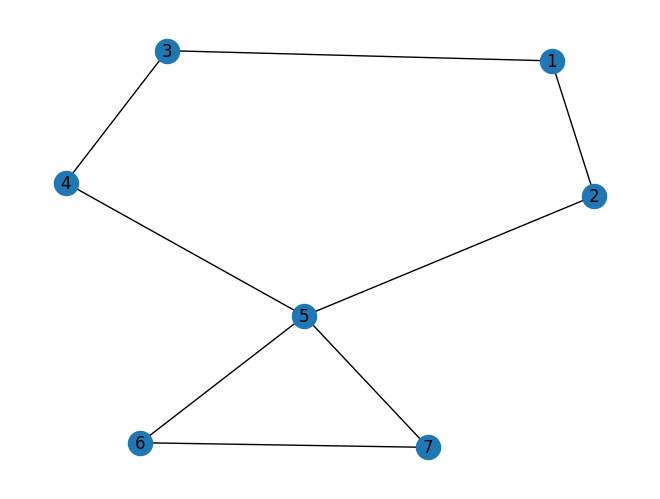

In [15]:
# q2
g1 = nx.Graph()
g1.add_edge(1,2)
g1.add_edge(2,5)
g1.add_edge(5,4)
g1.add_edge(4,3)
g1.add_edge(1,3)
g1.add_edge(5,7)
g1.add_edge(7,6)
g1.add_edge(5,6)
nx.draw(g1, with_labels=True)

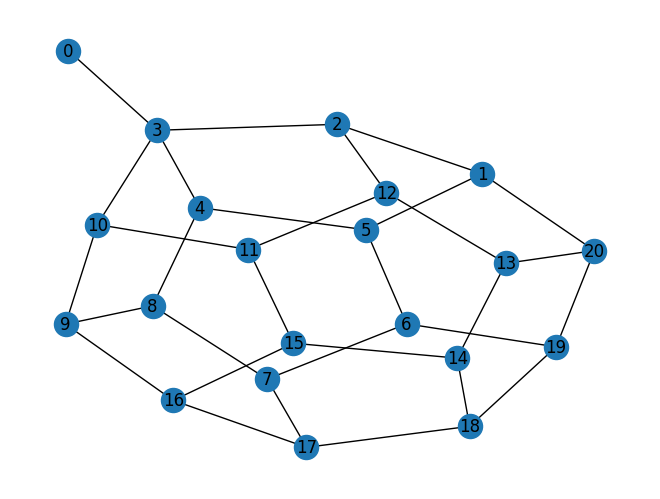

In [16]:
#q3
g2 = nx.Graph()

g2.add_edge(3,0)
g2.add_edge(1,2)
g2.add_edge(2,3)
g2.add_edge(3,4)
g2.add_edge(4,5)
g2.add_edge(5,1)
g2.add_edge(1,20)
g2.add_edge(2,12)
g2.add_edge(3,10)
g2.add_edge(4,8)
g2.add_edge(5,6)
g2.add_edge(12,13)
g2.add_edge(13,20)
g2.add_edge(20,19)
g2.add_edge(19,6)
g2.add_edge(6,7)
g2.add_edge(7,8)
g2.add_edge(8,9)
g2.add_edge(9,10)
g2.add_edge(10,11)
g2.add_edge(11,12)
g2.add_edge(13,14)
g2.add_edge(18,19)
g2.add_edge(17,7)
g2.add_edge(9,16)
g2.add_edge(11,15)
g2.add_edge(14,15)
g2.add_edge(15,16)
g2.add_edge(16,17)
g2.add_edge(17,18)
g2.add_edge(18,14)

nx.draw(g2, with_labels=True)

In [17]:
def get_edges(source, li):
    '''
    source : node
    li : undirected graph의 edges (list of (u,v))
    -> source에서 갈 수 있는 인접 노드 리스트 반환
    '''
    nbrs = []
    for u, v in li:
        if u == source:
            nbrs.append(v)
        elif v == source:
            nbrs.append(u)
    # 중복 제거(혹시 있을 경우)
    return list(dict.fromkeys(nbrs))


def do_backtrack(g, edges_list, source, first_Node, lately_node, li, visited_Node, path):
    '''
    g : undirected graph
    edges_list : 현재 source에서 나갈 수 있는 인접 노드 목록
    source : 현재 노드
    first_Node : 시작 노드
    lately_node : 바로 직전 방문 노드(불필요하지만 시그니처 유지)
    li : 그래프의 edge 리스트
    visited_Node : 방문한 노드 집합
    path : 현재까지의 경로 (list)
    -> 해밀토니안 순환을 찾으면 True
    '''
    n = g.number_of_nodes()

    # 모든 노드를 방문했고, 마지막 노드에서 시작 노드로 갈 수 있으면 순환 완성
    if len(path) == n:
        # source(현재 마지막 노드)에서 first_Node로 간선이 있는지 확인
        if first_Node in get_edges(source, li):
            return True
        return False

    # 인접 노드들 순회
    for nxt in edges_list:
        if nxt in visited_Node:
            continue
        # 방문
        visited_Node.add(nxt)
        path.append(nxt)

        # 다음 단계 인접 리스트
        nxt_edges = get_edges(nxt, li)

        if do_backtrack(g, nxt_edges, nxt, first_Node, source, li, visited_Node, path):
            return True

        # 백트래킹 (되돌리기)
        path.pop()
        visited_Node.remove(nxt)

    return False


def hamilton_graph(g, source):
    '''
    g : undirected graph
    source : start node
    -> 해밀토니안 그래프면 True, 아니면 False를 반환하고, 상태를 출력
    '''
    # 타입/연결성/차수 간단 체크 (빠른 탈락)
    if not isinstance(g, nx.Graph) or g.is_directed():
        raise TypeError("Input must be an undirected graph (nx.Graph).")

    # 노드가 3 미만이면(0,1,2) 해밀토니안 순환 불가
    if g.number_of_nodes() < 3:
        print("Not Hamiltonian")
        return False

    # 연결 그래프 아니면 불가
    if not nx.is_connected(g):
        print("Not Hamiltonian")
        return False

    # degree 0 또는 1이 있으면 불가(순환에서 각 정점은 두 간선을 가져야 함)
    for v in g.nodes():
        if g.degree(v) < 2:
            print("Not Hamiltonian")
            return False

    # 백트래킹 준비
    li = list(g.edges())
    visited = {source}
    path = [source]
    edges_from_source = get_edges(source, li)

    ok = do_backtrack(g, edges_from_source, source, source, None, li, visited, path)
    if ok:
        print("Hamiltonian")
        return True
    else:
        print("Not Hamiltonian")
        return False

In [18]:
print("g :", end = " ")
hamilton_graph(g,1)
# g is regarded as hamilton graph
print("g1 :", end = " ")
hamilton_graph(g1,1)
print("g2 :", end = " ")
hamilton_graph(g2,1)

g : Hamiltonian
g1 : Not Hamiltonian
g2 : Not Hamiltonian


False

# 문제 8: 그래프 알고리즘 사용하기

그래프 알고리즘이 주로 사용되는 예는 항공운항정보의 네트워크를 구성할때 사용한다. 그래프 모델에서, 항공사(airlines)혹은 공항(airports)는 노드(Nodes/Vertices)로 구성되고 각 공항간의 운항 정보는 관계(Relationships/Edges)로 표현된다.

## 항공운항정보 데이터 셋업

In [41]:
import pandas as pd

In [42]:
# 공항 정보, 항공사, 운항정보를 불러오기를 수행한다
airports = pd.read_csv("airports.csv", header=None)

In [43]:
usa_airports = airports[airports.iloc[:, 3] == 'United States'] # 미국 내 공항만 추출

In [44]:
usa_airports = usa_airports.loc[:,[1,4,6,7]]
usa_airports.rename(columns={1: 'name', 4: 'id', 6: 'latitude', 7: 'longitude'}, inplace=True)
usa_airports
# column_names=['name','id','latitude','longitude']

,name,id,latitude,longitude
3200,Barter Island LRRS Airport,BTI,70.134003,-143.582001
3201,Cape Lisburne LRRS Airport,LUR,68.875099,-166.110001
3202,Point Lay LRRS Airport,PIZ,69.732903,-163.005005
3203,Hilo International Airport,ITO,19.721399,-155.048004
3204,Orlando Executive Airport,ORL,28.545500,-81.332901
...,...,...,...,...
6996,Cape Canaveral AFS Skid Strip,XMR,28.467600,-80.566597
6997,Homey (Area 51) Airport,\N,37.235001,-115.810997
6998,Zanesville Municipal Airport,ZZV,39.944401,-81.892097
7048,Nenana Municipal Airport,ENN,64.547302,-149.074005


In [29]:
trips = pd.read_csv("188591317_T_ONTIME.csv.gz", low_memory=False)

In [30]:
trips.rename(columns={"ORIGIN":"src", "DEST":"dst", "DEP_DELAY":"deptDelay", "ARR_DELAY":"arrDelay","TAIL_NUM":"tailNumber","FL_NUM":"flightNumber","FL_DATE":"date", "CRS_DEP_TIME":"time","CRS_ARR_TIME":"arrivalTime","DISTANCE":"distance","UNIQUE_CARRIER":"airline"}, inplace=True)

In [31]:
G = nx.from_pandas_edgelist(trips, source="src", target="dst", edge_attr=['distance'])

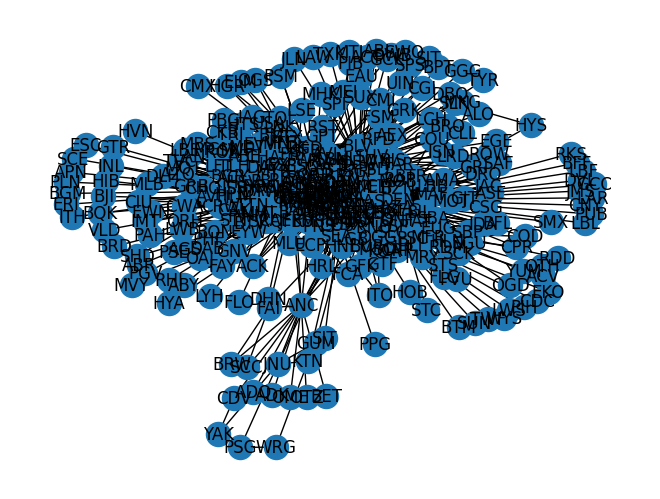

In [32]:
nx.draw(G, with_labels=True)

In [33]:
trips

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,date,airline,AIRLINE_ID,CARRIER,tailNumber,...,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,2018,2,5,1,2,2018-05-01,DL,19790,DL,N6709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,2,5,1,2,2018-05-01,DL,19790,DL,N820DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,2,5,1,2,2018-05-01,DL,19790,DL,N856DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,2,5,1,2,2018-05-01,DL,19790,DL,N329NB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,2,5,1,2,2018-05-01,DL,19790,DL,N697DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616524,2018,2,5,17,4,2018-05-17,UA,19977,UA,N76502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616525,2018,2,5,17,4,2018-05-17,UA,19977,UA,N73860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616526,2018,2,5,17,4,2018-05-17,UA,19977,UA,N48127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616527,2018,2,5,17,4,2018-05-17,UA,19977,UA,N822UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


미국 공항 개수, 항로의 수

In [34]:
G.number_of_nodes()

341

In [35]:
G.number_of_edges()

2677

## 최단거리 알고리즘
최단거리 알고리즘은 다양한 방법들이 존재한다. 학습한 Dijkstra 이외에도, A*, Bellman-Ford, Floyd-Warshall, Yen's 등 다양한 알고리즘이 존재한다.
https://networkx.org/documentation/stable//reference/algorithms/shortest_paths.html#
참고하여 다음 문제를 해결하시오

## 문제 8-1: 최단거리 문제
샌프란시스코 국제 공항(San Francisco International Airport)과 뉴욕의 존 F 케네디 국제 공항(John F Kennedy International Airport)사이에 직항(non-stop flight)이 있는지 찾으시오.
힌트: 공항 코드를 사용하여, 두 공항 사이에 최단거리 경로 내 경유 공항이 있는지를 확인

출력의 결과는 참고용입니다.

In [48]:
# 샌프란시스코 국제 공항을 찾는 예제
src = usa_airports[usa_airports.name.str.contains('San Francisco International Airport')]
# 존 F 케네디 국제 공황을 찾는 예제
dst = usa_airports[usa_airports.name.str.contains('John F Kennedy International Airport', case=False, na=False)]
# 공항코드 검색
def get_iata_by_name(df, name_pattern):
    rows = df[df['name'].str.contains(name_pattern, case=False, na=False)]
    if rows.empty:
        raise ValueError(f"'{name_pattern}' 로 공항을 찾지 못했습니다.")
    # 중복 있을 수 있으니 첫 행 사용 (필요하면 더 엄격한 필터 추가)
    return rows.iloc[0]['id']

# SFO / JFK IATA 코드 얻기
sfo_code = get_iata_by_name(usa_airports, 'San Francisco International Airport')  # 보통 'SFO'
jfk_code = get_iata_by_name(usa_airports, 'John F Kennedy International Airport') # 보통 'JFK'

print("SFO:", sfo_code, "JFK:", jfk_code)

# 직항 여부
if G.has_edge(sfo_code, jfk_code):
    print("샌프란시스코(SFO) ↔ 뉴욕(JFK) 직항 있음 ✅")
else:
    print("직항 없음. 최단 경유 경로를 탐색합니다...")
    try:
        # 경유 최소(엣지 수 최소)
        path_hops = nx.shortest_path(G, source=sfo_code, target=jfk_code)
        print("최단(경유 최소) 경로:", path_hops)
        if len(path_hops) > 2:
            print("경유 공항들:", path_hops[1:-1])
    except nx.NetworkXNoPath:
        print("SFO와 JFK 사이에 연결 경로가 없습니다. ❌")

SFO: SFO JFK: JFK
샌프란시스코(SFO) ↔ 뉴욕(JFK) 직항 있음 ✅


In [49]:
def has_nonstop_flight(graph, src, dst):
    '''
    두 공항 사이에 non-stop flight(직항)가 있는지 체크
    :param graph: trips 그래프 (nx.Graph 또는 nx.DiGraph)
    :param src: 출발 공항 IATA 코드 (예: 'SFO')
    :param dst: 도착 공항 IATA 코드 (예: 'JFK')
    :return: Boolean
    '''
    # 노드가 없으면 직항도 없음
    if src not in graph or dst not in graph:
        return False

    # DiGraph면 방향 고려, Graph면 순서 상관없이 has_edge가 처리함
    if graph.is_directed():
        return graph.has_edge(src, dst)
    else:
        return graph.has_edge(src, dst)

In [50]:
has_nonstop_flight(G, src, dst)

False

## 문제 8-2: 주어진 공항들을 순서대로 경유하는 경로의 최단 거리(distance)를 계산하는 함수를 작성하시오

다음 4개의 공항을 순서대로 경유하면 된다.(출발 시간은 고려하지 않는다)
Los Angeles International Airport -> Hartsfield Jackson Atlanta International Airport -> Miami International Airport -> Washington Dulles International Airport


In [51]:
def _to_iata(token, airports_df, graph):
    """
    token이 IATA 코드(길이 3)면 그대로, 아니면 이름으로 찾아 IATA('id' 컬럼) 반환.
    그래프에 없는 노드는 에러.
    """
    if isinstance(token, str) and len(token) == 3 and token.upper() in graph:
        return token.upper()

    # 이름으로 매칭 (부분일치 허용)
    rows = airports_df[airports_df['name'].str.contains(str(token), case=False, na=False)]
    if rows.empty:
        raise ValueError(f"공항 이름을 찾을 수 없습니다: {token}")
    iata = rows.iloc[0]['id']
    if pd.isna(iata) or iata not in graph:
        raise ValueError(f"IATA 코드가 없거나 그래프에 없습니다: {token} -> {iata}")
    return iata

def _path_distance(graph, path):
    """
    경로 상 인접 노드 간 edge 'distance' 합계를 계산.
    """
    total = 0.0
    for u, v in zip(path[:-1], path[1:]):
        data = graph.get_edge_data(u, v)
        if data is None:
            raise ValueError(f"엣지가 없습니다: {u} -> {v}")
        # MultiGraph가 아니라면 dict, 맞다면 가장 짧은 distance 선택 필요
        if isinstance(data, dict) and 'distance' in data:
            dist = data['distance']
        else:
            # MultiGraph 케이스 대응: 가장 작은 distance 사용
            dists = []
            for k, ed in (data.items() if isinstance(data, dict) else []):
                if isinstance(ed, dict) and 'distance' in ed:
                    dists.append(ed['distance'])
            if not dists:
                raise ValueError(f"distance 속성이 없습니다: {u} -> {v}")
            dist = min(dists)
        total += float(dist)
    return float(total)

def shortest_path_length_from_airports(graph, airport_seq, airports_df=None):
    '''
    주어진 공항의 시퀀스(sequence)로부터 최단경로의 거리를 계산하시오
    :param graph: trips 그래프 (nx.Graph 또는 nx.DiGraph), edge_attr에 'distance' 포함
    :param airport_seq: 공항정보 (list형). 공항 이름 또는 IATA 코드(혼용 가능)
    :param airports_df: (선택) 공항 매핑용 DataFrame. 기본은 전역 usa_airports 사용
    :return: 총 거리(distance) 값(float형)
    '''
    if airports_df is None:
        # 전역 usa_airports를 사용할 수 있게 함
        if 'usa_airports' in globals():
            airports_df = globals()['usa_airports']
        else:
            raise ValueError("airports_df를 전달하거나 전역에 usa_airports가 있어야 합니다.")

    if not isinstance(airport_seq, (list, tuple)) or len(airport_seq) < 2:
        return 0.0

    # 1) 이름/코드를 IATA로 변환
    codes = [_to_iata(tok, airports_df, graph) for tok in airport_seq]

    # 2) 구간별 최단경로(거리 최소) 계산 후 거리 합
    total_distance = 0.0
    for s, t in zip(codes[:-1], codes[1:]):
        try:
            path = nx.shortest_path(graph, source=s, target=t, weight='distance')
        except nx.NetworkXNoPath:
            raise ValueError(f"경로가 없습니다: {s} -> {t}")
        total_distance += _path_distance(graph, path)

    return float(total_distance)

In [52]:
seq = [ ]
shortest_path_length_from_airports(G, seq)

0.0

## 문제 8-3: 단일 출발지 최단거리 찾기 (Single source shortest path)

---


Los Angeles International Airport 국제 공항에서 직항(Non-stop)으로 이동할수 있는 공항 중에서 가장 가까운 공항과 가장 먼 공항을 반환하는 함수를 작성하시오

In [53]:
def get_farthest_or_shortest_airports_from(graph, src):
    '''
    Los Angeles International Airport 같은 출발지(src)에서
    직항(Non-stop)으로 이동 가능한 공항들 중
    가장 먼 공항과 가장 가까운 공항의 IATA 코드를 반환.

    :param graph: trips 그래프 (nx.Graph / nx.DiGraph / nx.MultiGraph / nx.MultiDiGraph)
                  엣지 속성에 'distance'가 포함되어 있어야 함
    :param src: 출발지 IATA 코드 (예: 'LAX')
    :return: (farthest_airport_code, shortest_airport_code)
             이웃이 없으면 (None, None)
    '''
    if src not in graph:
        return (None, None)

    # 1) 직항 이웃 얻기: 방향 그래프면 successors(출발→도착), 무방향이면 neighbors
    if graph.is_directed():
        neighbors = list(graph.successors(src))
    else:
        neighbors = list(graph.neighbors(src))

    if not neighbors:
        return (None, None)

    # 2) 각 이웃까지 거리 계산 (멀티그래프 대비)
    dist_by_airport = {}  # nbr -> min_distance
    for nbr in neighbors:
        data = graph.get_edge_data(src, nbr)
        if data is None:
            continue

        # 단일 엣지 그래프 (dict에 'distance'가 직접 있음)
        if isinstance(graph, (nx.Graph, nx.DiGraph)) and 'distance' in data:
            try:
                d = float(data['distance'])
                dist_by_airport[nbr] = d
            except (TypeError, ValueError):
                pass
        else:
            # 멀티그래프: data는 {key: {'distance': ...}, ...} 형태
            dists = []
            for _, ed in (data.items() if isinstance(data, dict) else []):
                if isinstance(ed, dict) and 'distance' in ed:
                    try:
                        dists.append(float(ed['distance']))
                    except (TypeError, ValueError):
                        continue
            if dists:
                dist_by_airport[nbr] = min(dists)

    if not dist_by_airport:
        return (None, None)

    # 3) 최대/최소 거리 공항 선택
    farthest_airport  = max(dist_by_airport, key=lambda k: dist_by_airport[k])
    shortest_airport  = min(dist_by_airport, key=lambda k: dist_by_airport[k])

    # 4) 지정된 반환 순서: (farthest, shortest)
    return (farthest_airport, shortest_airport)

In [54]:
get_farthest_or_shortest_airports_from(G, src)

(None, None)

## 문제 8-4: 출발을 제일 많이 하는 공항은?
주어진 trips 그래프로부터 제일 많은 수의 출발지(src)를 가진 공항이 어디인지 탐색하시오.

In [55]:
def get_airport_with_highest_out_degree(graph):
    '''
    graph로부터 가장 높은 out-degree를 가진 공항을 찾아서 반환
    :param graph: trips 그래프 (nx.Graph / nx.DiGraph)
    :return: airport code (str)
    '''
    if graph.is_directed():
        # DiGraph의 경우 out-degree
        airport, deg = max(graph.out_degree, key=lambda x: x[1])
    else:
        # 무방향 그래프라면 degree
        airport, deg = max(graph.degree, key=lambda x: x[1])

    return airport

In [56]:
get_airport_with_highest_out_degree(G)

'DFW'

## Floyd Washall 알고리즘 활용
Floyd Washall 알고리즘은 모든 쌍의 경로의 가중치를 계산하는 데 사용된다. 다음 예제를 사용하여 우리는 LAX 코드를 가진 공항에서 출발하는 모든 공항에 대한 최단경로의 거리값을 계산할 수 있다.
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.dense.floyd_warshall.html#networkx.algorithms.shortest_paths.dense.floyd_warshall

In [57]:
all_pairs_shortest_path = nx.floyd_warshall(G, weight='distance')

In [58]:
# 예시 floyd_warshall
for k, dists in all_pairs_shortest_path.items():
  if k == 'LAX':
    print(dists)

defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7ad5419cf380>, {'LAX': 0, 'ATL': 1946.0, 'SLC': 590.0, 'LAS': 236.0, 'DTW': 1978.0, 'MSP': 1535.0, 'SAN': 109.0, 'DFW': 1235.0, 'ANC': 2345.0, 'SEA': 954.0, 'PHL': 2401.0, 'JFK': 2475.0, 'MCO': 2218.0, 'AUS': 1242.0, 'MIA': 2342.0, 'OAK': 337.0, 'IAH': 1379.0, 'RNO': 391.0, 'CVG': 1900.0, 'BOS': 2610.0, 'SFO': 337.0, 'PDX': 834.0, 'BNA': 1797.0, 'MSY': 1670.0, 'HNL': 2556.0, 'TPA': 2158.0, 'MCI': 1363.0, 'DEN': 862.0, 'IND': 1814.0, 'RDU': 2239.0, 'OGG': 2486.0, 'KOA': 2504.0, 'CMH': 1995.0, 'LIH': 2615.0, 'DCA': 2311.0, 'MEM': 1619.0, 'SJC': 308.0, 'MFR': 630.0, 'BLI': 1047.0, 'SGF': 1423.0, 'TUL': 1283.0, 'EUG': 748.0, 'BOI': 674.0, 'PVU': 569.0, 'MSO': 923.0, 'EWR': 2454.0, 'ORD': 1744.0, 'IAD': 2288.0, 'CLE': 2052.0, 'ITO': 2449.0, 'BWI': 2329.0, 'SDF': 1843.0, 'FLL': 2342.0, 'DAL': 1246.0, 'ABQ': 677.0, 'ELP': 715.0, 'HOU': 1390.0, 'MDW': 1750.0, 'MKE': 1756.0, 'PHX': 370.0, 'PIT

## 문제 8-5: 1시간 내 도착지 계산 (Floyd Washall 알고리즘의 활용)
비행기의 속도가 500 km/h 라고 가정할 때 2시간내로 도착하는 공항 코드를 반환하는 함수를 작성하시오

In [61]:
def get_airports_within_2hours(G, speed, src_code='LAX'):
    '''
    Floyd–Warshall로 모든쌍 최단시간을 구해
    src_code(기본 LAX)에서 2시간 내 도착 가능한 공항 목록 반환.
    :param G: trips 그래프 (edge_attr에 'distance'가 mile 단위로 있어야 함)
    :param speed: 비행기 속도 (km/h)
    :param src_code: 출발 공항 IATA (기본 'LAX')
    :return: 공항 코드 list
    '''
    # 노드 목록 및 인덱스 매핑
    nodes = list(G.nodes())
    n = len(nodes)
    idx = {node: i for i, node in enumerate(nodes)}
    if src_code not in idx:
        return []

    # 시간 가중치 행렬 초기화 (무한대)
    INF = float('inf')
    dist = [[INF]*n for _ in range(n)]
    for i in range(n):
        dist[i][i] = 0.0

    # 엣지 시간 가중치 세팅
    # distance(마일) -> 시간(시간) = distance_miles * 1.60934 / speed(km/h)
    def edge_min_time(u, v):
        data = G.get_edge_data(u, v)
        # 단일 그래프
        if isinstance(G, (nx.Graph, nx.DiGraph)):
            miles = data.get('distance', None)
            if miles is None:
                return None
            try:
                miles = float(miles)
            except:
                return None
            return (miles * 1.60934) / float(speed)
        # 멀티그래프
        else:
            best = None
            for _, ed in (data.items() if isinstance(data, dict) else []):
                if 'distance' in ed:
                    try:
                        miles = float(ed['distance'])
                        t = (miles * 1.60934) / float(speed)
                        best = t if best is None else min(best, t)
                    except:
                        continue
            return best

    for u, v in G.edges():
        t = edge_min_time(u, v)
        if t is None:
            continue
        i, j = idx[u], idx[v]
        dist[i][j] = min(dist[i][j], t)
        # 무방향 그래프면 반대 방향도 설정
        if not G.is_directed():
            dist[j][i] = min(dist[j][i], t)

    # Floyd–Warshall
    for k in range(n):
        dk = dist[k]
        for i in range(n):
            di, dik = dist[i], dist[i][k]
            if dik == INF:
                continue
            alt_ik = dik
            for j in range(n):
                via = alt_ik + dk[j]
                if via < di[j]:
                    di[j] = via

    # src에서 2시간 이내 도착 가능한 공항 수집 (자기 자신 제외)
    s = idx[src_code]
    within = [nodes[j] for j in range(n) if j != s and dist[s][j] <= 2.0]

    # 정렬해서 반환(가독성)
    within.sort()
    return within

In [62]:
flight_speed = 500 # km/h
get_airports_within_2hours(G, flight_speed)

['ACV',
 'AZA',
 'BFL',
 'BUR',
 'FAT',
 'FLG',
 'LAS',
 'LGB',
 'MRY',
 'OAK',
 'ONT',
 'PHX',
 'PSP',
 'PVU',
 'RDD',
 'RNO',
 'SAN',
 'SBA',
 'SBP',
 'SCK',
 'SFO',
 'SGU',
 'SJC',
 'SLC',
 'SMF',
 'SMX',
 'SNA',
 'STS',
 'TUS',
 'YUM']

완료한 숙제는 ipynb 파일형식으로 다운로드 받아서, 가상대학 내 [과제 7,8에 업로드하시기 바랍니다.

# 감사합니다.